## Questão 1

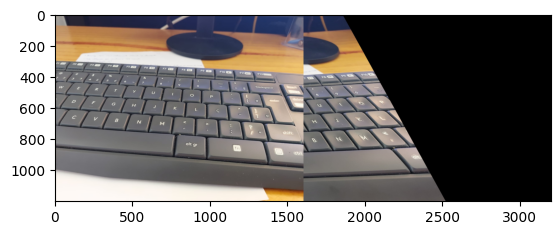

In [3]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('test1.jpeg')
img2 = cv2.imread('test2.jpeg')

sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

panorama_width = img1.shape[1] + img2.shape[1]
panorama_height = img1.shape[0]
panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))

panorama[0:img1.shape[0], 0:img1.shape[1]] = img1

cv2.imwrite('result0.jpeg', panorama)

panorama = cv2.imread('result0.jpeg')

panorama = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

plt.imshow(panorama)
plt.show()

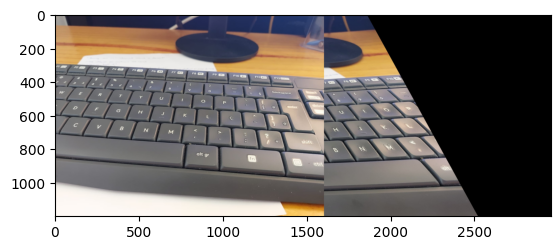

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('test1.jpeg')
img2 = cv2.imread('test2.jpeg')

sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Compute the dimensions of the resulting image
panorama_width = int(img1.shape[1] + img2.shape[1] - H[0, 2])
panorama_height = int(img2.shape[0])

# Warp the second image to the perspective of the first image
panorama = cv2.warpPerspective(img2, H, (panorama_width, panorama_height))

# Blend the two images together
panorama[0:img1.shape[0], 0:img1.shape[1]] = img1

cv2.imwrite('result1.jpeg', panorama)

panorama = cv2.imread('result1.jpeg')

panorama = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

plt.imshow(panorama)
plt.show()


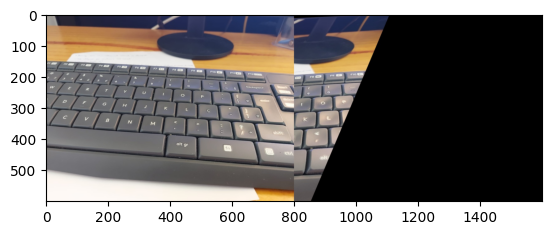

In [7]:
import cv2
import numpy as np

img1 = cv2.imread('test1.jpeg')
img2 = cv2.imread('test2.jpeg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher()
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

result = cv2.warpPerspective(img2, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))
result[0:img1.shape[0], 0:img1.shape[1]] = img1

resized_img = cv2.resize(result, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

cv2.imwrite('result2.jpeg', resized_img)
result = cv2.imread('result2.jpeg')

result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result)
plt.show()


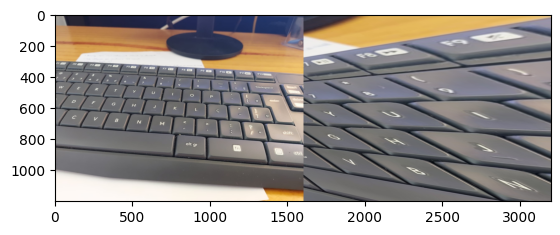

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('test1.jpeg')
img2 = cv2.imread('test2.jpeg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Find the ORB features and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Match the features using Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort the matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Find the Homography matrix using RANSAC
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

# Warp the second image using the Homography matrix
result = cv2.warpPerspective(img2, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))

# Stitch the images together
result[0:img1.shape[0], 0:img1.shape[1]] = img1

cv2.imwrite('result3.jpeg', result)

result = cv2.imread('result3.jpeg')
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result)
plt.show()

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

IMAGES_PATH = './images'

In [3]:
image1 = cv2.imread(os.path.join(IMAGES_PATH, 'ic2.jpg'))
image2 = cv2.imread(os.path.join(IMAGES_PATH, 'ic3.jpg'))

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [4]:
orb = cv2.ORB_create(nfeatures=2000)
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

In [5]:
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [16]:
good = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good.append(m)

In [11]:
def warp_images(image1, image2, H):
    rows1, cols1 = image1.shape[:2]
    rows2, cols2 = image2.shape[:2]
    
    list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
    
    translation_dist = [-x_min,-y_min]
    
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(image2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
    output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = image1

    return output_img

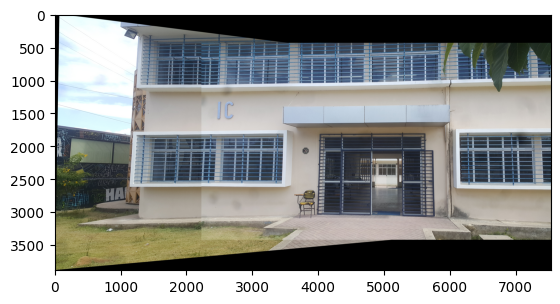

In [17]:
MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    
    result = warp_images(image2, image1, M)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

## Questão 3

In [9]:
import cv2
import numpy as np

# variables to store coordinates where the second image has to be placed
positions=[] 
positions2=[]
count=0

# Mouse callback function
def draw_circle(event,x,y,flags,param):
    global positions,count
    # If event is Left Button Click then store the coordinate in the lists, positions and positions2
    if event == cv2.EVENT_LBUTTONUP:
        cv2.circle(building,(x,y),2,(255,0,0),-1)
        positions.append([x,y])
        if(count!=3):
            positions2.append([x,y])
        elif(count==3):
            positions2.insert(2,[x,y])
        count+=1
        
# Reading the two images and storing it in variables img and dp
building = cv2.imread('piscina.jpg')
dp = cv2.imread('aab.jpg')

# Defing a window named 'image'
cv2.namedWindow('image')

cv2.setMouseCallback('image',draw_circle)

while(True):
    cv2.imshow('image',building)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

height, width = building.shape[:2]
h1,w1 = dp.shape[:2]

pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
pts2=np.float32(positions)


h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)

height, width, channels = building.shape
im1Reg = cv2.warpPerspective(dp, h, (width, height))

mask2 = np.zeros(building.shape, dtype=np.uint8)

roi_corners2 = np.int32(positions2)

channel_count2 = building.shape[2]  
ignore_mask_color2 = (255,)*channel_count2

cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)

mask2 = cv2.bitwise_not(mask2)
masked_image2 = cv2.bitwise_and(building, mask2)

#Using Bitwise or to merge the two images
final = cv2.bitwise_or(im1Reg, masked_image2)
cv2.imwrite('final.jpg',final)

True